In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris
import sklearn.metrics as metrics
import warnings
warnings.simplefilter('ignore')
plt.rcParams["figure.figsize"] = (12,8)
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False


![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)


In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [9]:
# sns.pairplot(iris_df, hue='species')

# plt.show()

In [10]:
# plt.xticks(rotation=45)
# sns.boxplot(data=iris_df)
# plt.show()

In [11]:
x_data = iris_df.iloc[:, :-1]
y_data = iris_df.iloc[:, -1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

In [13]:
model_logi =LogisticRegression(multi_class='multinomial')
model_logi.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
# LogisLogisticRegression 의 파라미터 multi_class 에서
# auto, ovr, multinomial이 있는데,
# ovr을 선택하면 2진 분류를 수행하고 내부적으로 sigmoid를 사용한다.
# multinomial 은 다중 분류

In [15]:
model_logi.score(x_test, y_test)

1.0

In [16]:
model_logi.coef_

array([[-0.39389462,  0.90166179, -2.36741829, -0.93568167],
       [ 0.52042162, -0.33532972, -0.18565228, -0.87860234],
       [-0.12652701, -0.56633207,  2.55307058,  1.81428401]])

In [17]:
model_logi.intercept_

array([  9.26545663,   1.98515821, -11.25061484])

In [18]:
model_logi.predict_proba([[5.7,2.6,3.5,1.0]])

array([[0.0821382 , 0.91304928, 0.00481252]])

In [19]:
model_logi.predict_proba([[5.7,2.6,3.5,1.0]]).argmax(axis=1)

array([1], dtype=int64)

In [20]:
# 이렇게 하면 z값.
z = np.matmul([[5.7,2.6,3.5,1.0]], model_logi.coef_.T) + model_logi.intercept_

In [21]:
def softmax(x):
    e = np.exp(x)
#     print(e)
    print(e/np.sum(e))

In [22]:
softmax(z)

[[0.0821382  0.91304928 0.00481252]]


In [23]:
# 이 z를 softmax를 통과 시켜면 predict_proba값과 동일하다.
# 함수를 실행시키지 않고, 직접 구해보는 과정.

In [24]:
x_test # 5.7	2.6	3.5	1.0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
102,7.1,3.0,5.9,2.1
129,7.2,3.0,5.8,1.6
54,6.5,2.8,4.6,1.5
41,4.5,2.3,1.3,0.3
136,6.3,3.4,5.6,2.4
8,4.4,2.9,1.4,0.2
65,6.7,3.1,4.4,1.4
7,5.0,3.4,1.5,0.2
85,6.0,3.4,4.5,1.6


In [25]:
y_test

59     1
102    2
129    2
54     1
41     0
136    2
8      0
65     1
7      0
85     1
81     1
97     1
49     0
126    2
114    2
64     1
135    2
32     0
98     1
38     0
46     0
128    2
4      0
67     1
30     0
48     0
63     1
141    2
137    2
121    2
Name: species, dtype: int32

## 1.

6.8, 3.0, 5.5, 2.1

5.8, 2.8, 5.1, 2.4

각각의 종을 예측 하시요

2.confusion matrix 를 구하고 heatmap을 그리시요

3. f1 score 를 구하시요,

40분까지 1조에서 제출


In [26]:
model_logi.predict_proba([[6.8, 3.0, 5.5, 2.1]])

array([[5.41697039e-05, 8.39334039e-02, 9.16012426e-01]])

In [27]:
model_logi.predict_proba([[5.8, 2.8, 5.1, 2.4]])

array([[1.70266021e-04, 5.75562881e-02, 9.42273446e-01]])

In [28]:
model_logi.predict_proba([[6.8, 3.0, 5.5, 2.1]]).argmax(axis=1)

array([2], dtype=int64)

In [35]:
model_logi.predict_proba([[6.8, 3.0, 5.5, 2.1],[5.8, 2.8, 5.1, 2.4] ]).argmax(axis=1)  #2x4 4x3   2x3

array([2, 2], dtype=int64)

In [36]:
model_logi.predict([[6.8, 3.0, 5.5, 2.1],[5.8, 2.8, 5.1, 2.4] ])

array([2, 2])

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [37]:
y_test_pred = model_logi.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)
cm_train
# ps = precision_score(y_test, y_test_pred)
# rs = recall_score(y_test, y_test_pred)
# f1score = (2 * ps * rs) / (ps + rs)
# print('precision : ', precision_score(y_test, y_test_pred))
# print('recall : ', recall_score(y_test, y_test_pred))
# print('f1 score : ', f1score)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

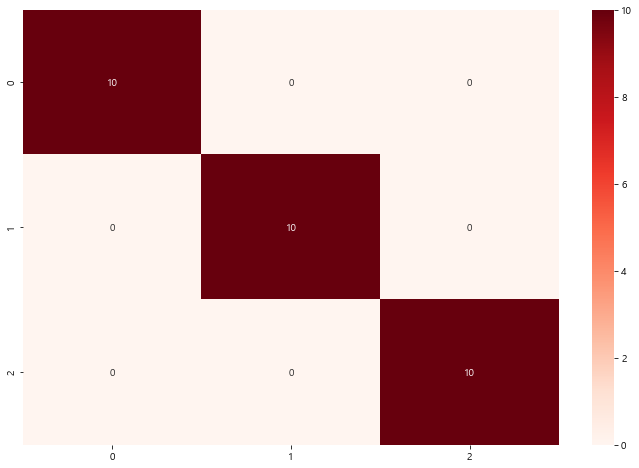

In [31]:
sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1,2],
            xticklabels=[0,1, 2])
plt.show()

In [32]:
ps = precision_score(y_test, y_test_pred, average='weighted')
rs = recall_score(y_test, y_test_pred, average='weighted')
f1score = (2 * ps * rs) / (ps + rs)

In [33]:
print('precision : ', precision_score(y_test, y_test_pred, average='weighted'))
print('recall : ', recall_score(y_test, y_test_pred, average='weighted'))
print('f1 score : ', f1score)

precision :  1.0
recall :  1.0
f1 score :  1.0


In [40]:
f1_score( y_test, y_test_pred, average='macro')

1.0